In [1]:
import numpy as np
def EulerMethod(f, t0, tend, u, N):
    h = (tend-t0)/N
    t = np.linspace(t0, tend, N)
    result = []
    result.append(u)
    for k in range(1, N):
        u = u + h * f(t[k-1], u)
        result.append(u)
    return h, np.array(t), np.array(result)

# define the right side function
def f(t, u):
    eps = 1
    f = np.zeros(2)
    f[0] = u[1]
    f[1] = -eps*(u[0]**2-1)*u[1]-u[0]
    return f

In [2]:
# parameters
t0 = 0.0
tend = 1
N = [16, 32, 64, 128, 256, 512, 1024, 2048]
u = np.array([1.0, 0.0])
h, t, result = EulerMethod(f, t0, tend, u, 8192) # here y(1) is approximated by N = 8192

In [3]:
y1 = result[-1][0]

In [5]:
u_N = []
step = []
e = []
for k in range(0, len(N)):
    h, t, result = EulerMethod(f, t0, tend, u, N[k])
    u_N.append(result[-1][0])
    e.append(u_N[k]-y1)
    step.append(h)

In [6]:
print("\n          N ", end="  ")
print("         h ", end=" ")
print("         u_1N", end="  ")
print("       u_1N-y(1)", end = " ")
print("\n         ________________________________________________", end= " ")
print()
for i in range(0, len(N)):
    print("{:12d}".format(N[i]),  end=" ")
    print("{:12.4f}".format(step[i]), end=" ")
    print("{:14.4f}".format(u_N[i]), end=" ")
    print("{:14.4f}".format(e[i]),  end = " ")
    print()


          N            h           u_1N         u_1N-y(1) 
         ________________________________________________ 
          16       0.0625         0.5902         0.0924 
          32       0.0312         0.5453         0.0475 
          64       0.0156         0.5218         0.0240 
         128       0.0078         0.5098         0.0120 
         256       0.0039         0.5037         0.0059 
         512       0.0020         0.5007         0.0029 
        1024       0.0010         0.4991         0.0013 
        2048       0.0005         0.4984         0.0006 


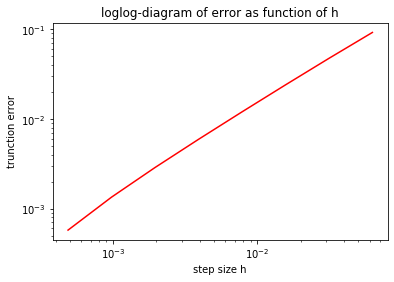

In [8]:
import matplotlib.pyplot as plt
plt.loglog(step, e, 'r')
plt.xlabel('step size h')
plt.ylabel('trunction error')
plt.title('loglog-diagram of error as function of h')
plt.show()